In [ ]:
!mkdir ../checkpoints
!wget https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth -P ../checkpoints

In [29]:
import torch
import matplotlib.pyplot as plt
from mmengine.model.utils import revert_sync_batchnorm
from mmseg.apis import init_model, inference_model, show_result_pyplot

In [30]:
config_file = '../configs/test/test.py'
checkpoint_file = '../work_dirs/test/iter_40000.pth'

In [31]:
# build the model from a config file and a checkpoint file
model = init_model(config_file, checkpoint_file, device='cuda')

Loads checkpoint by local backend from path: ../work_dirs/test/iter_40000.pth


In [38]:
# test a single image
img = '/Dataset/nachi_manual_1028/validation/img/10.png'
if not torch.cuda.is_available():
    model = revert_sync_batchnorm(model)
result = inference_model(model, img)

True

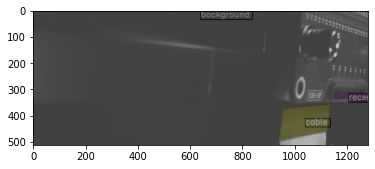

In [39]:
# show the results
vis_result = show_result_pyplot(model, img, result, show=False)
plt.imshow(vis_result)
import cv2
cv2.imwrite("a.png",vis_result)